In [1]:
# Imports
import matplotlib.pyplot as plt
from preamble import *
from DRN_interface import *
from pbarlike import *
# np.set_printoptions(precision=5)

 Loading python backend - pbarlike 1.0


/users/ttp/sbalan/.local/lib/python3.7/site-packages/h5py/__init__.py:39: UserWarning: h5py is running against HDF5 1.10.8 when it was built against 1.10.7, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


 Imported required python modules - numpy, tensorflow, iminuit.Minuit
 Loaded and processed AMS-02 dataset
 Loaded required custom python modules - DRN_interface, solar_mod
     Loaded pbarlike 1.0


In [2]:
# Reusable params that give preference for DM and other default or best fit params
## Global Params
pp_marg = np.array([0.0])
prevent_ex = True
data_arg=phi_ams
errors_arg=error_ams
data_cov_arg=ams_7y_cov
xsection_cov_arg=True

## Params that give DM preference for run1 + b bbar + marginalization over multinest sample
mDMrun1bb = np.array([100])
b_bbar_bf = np.array([0,0,1,0,0,0,0,0])
svDMrun1bb = 10**(-25.5228)
pmrun1 = "run1"
run1_bb_marg = [mDMrun1bb,b_bbar_bf,svDMrun1bb,pp_marg,pmrun1]

## Params that give DM preference for DIFF.BRK _ b bbar + marginalization %# For routine x-check, see local DRN example notebook
m_DM_xc  = np.array([10**(5.018181818181818 - 3)])
b_bbar_bf = np.array([1.000e-05, 1.000e-05, 9.993e-01, 1.000e-05, 1.000e-05, 1.000e-05,  1.000e-05, 1.000e-05])
sv_xc = 5.3366992312063e-27
pmdb = "DIFF.BRK"
ppdbmarg = np.genfromtxt('dependencies/'+ pmdb +'/multinest_sample.dat')
pp_db_xc = np.array(ppdbmarg[0,:10])
xcheck_db = [m_DM_xc,b_bbar_bf,sv_xc,pp_db_xc,pmdb]

## From example notebook
m_DM = np.array([100.])
equal_bf = np.ones((1, 8))* 1/8
def_sv = 10**(-25.5228)
pp_run1 = np.array([1.8, 1.79, 2.405, 2.357, 7.92e+03, 0.37, 2.05e+28, 0.419, 8.84, 0.09, 2.60])
pp_db = np.array([2.34, 2.28, 3.63e+28, -0.66, 0.52, -0.15, 3.83e+3, 0.4, 2.05e+5, 0.21])
drn_example_xcheck_run1 = [m_DM,equal_bf,def_sv,pp_run1,pmrun1]
drn_example_xcheck_db = [m_DM,equal_bf,def_sv,pp_db,pmdb]

## Scalar Singlet
# lambda_hS = 0.0001
m_s100 = np.array([100.])
bf_ss_0001 = np.fromstring('0.00000000e+00 1.02133998e-06 2.40315289e-03 0.00000000e+00 7.41973454e-01 2.55334994e-01 0.00000000e+00 0.00000000e+00',sep=' ')
sigma_v_ss_0001 = 1.701045825869065e-31
xcheck_db_ssdm1 = [m_s100,bf_ss_0001,sigma_v_ss_0001,pp_db_xc,pmdb]
# lambda_hS = 0.001
m_s1000 = np.array([1000.])
bf_ss_001 = np.fromstring('0.00000000e+00 4.40629758e-07 6.23447950e-06 1.81820266e-02 4.89115645e-01 2.43878879e-01 0.00000000e+00 2.48815994e-01',sep=' ')
sigma_v_ss_001 = 2.369587247718693e-31
xcheck_db_ssdm2 = [m_s1000,bf_ss_001,sigma_v_ss_001,pp_db_xc,pmdb]

In [3]:
# Setting params for check
[DM_mass,bf,sigma_v,prop_params,prop_model] = xcheck_db

In [4]:
# Initializing DRN
DRN = DRNet(propagation_parameters=prop_params,propagation_model=prop_model,prevent_extrapolation=prevent_ex,data=data_arg,errors=errors_arg,data_cov=data_cov_arg,xsection_cov=xsection_cov_arg)

Initializing DRN

 The simulation tool has been initiated. 



In [5]:
# Unmodulated and solar modulated secondary antiproton fluxes
DRN.phi_CR_LIS,DRN.phi_CR

(<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
 array([[4.4431342e-03, 6.2424135e-03, 9.0337256e-03, 1.3011872e-02,
         1.7967599e-02, 2.2995971e-02, 2.6557745e-02, 2.7313534e-02,
         2.4880415e-02, 2.0148275e-02, 1.4663269e-02, 9.6997619e-03,
         5.8958321e-03, 3.3327700e-03, 1.7713162e-03, 9.0158224e-04,
         4.4571247e-04, 2.1590428e-04, 1.0279409e-04, 4.8201669e-05,
         2.2363191e-05, 1.0288031e-05, 4.6990417e-06, 2.1362061e-06,
         9.7433451e-07, 4.5327428e-07, 2.1091469e-07, 9.7959109e-08]],
       dtype=float32)>,
 array([[6.39903420e-03, 8.15157632e-03, 1.00792527e-02, 1.19937286e-02,
         1.37702556e-02, 1.54697142e-02, 1.65595168e-02, 1.75944167e-02,
         1.78348147e-02, 1.78299098e-02, 1.74337239e-02, 1.65135144e-02,
         1.56135992e-02, 1.42189462e-02, 1.28583712e-02, 1.15139034e-02,
         1.00474388e-02, 8.77285823e-03, 7.53479856e-03, 6.39323761e-03,
         5.43174684e-03, 4.53632108e-03, 3.77121279e-03, 3.13263881e-03,
   

In [6]:
# Preprocessing DM params
DRN.preprocessing_DMparams(DM_mass=DM_mass,br_fr=bf,sigma_v=sigma_v)

In [7]:
# DM simulation
phi_DM_LIS = DRN.LIS_sim()
phi_DMCR = DRN.TOA_sim(phi_DM_LIS)

In [8]:
# Unmodulated primary antiproton flux
phi_DM_LIS

array([[[1.37061043e-03, 1.41383890e-03, 1.41137039e-03, 1.36758409e-03,
         1.28656126e-03, 1.17251832e-03, 1.02785389e-03, 8.58872179e-04,
         6.79021020e-04, 5.05693959e-04, 3.55521482e-04, 2.38757549e-04,
         1.59362506e-04, 1.05246981e-04, 6.25595969e-05, 2.96754826e-05,
         1.10616882e-05, 3.22504886e-06, 6.59722859e-07, 8.82015482e-08,
         7.64021903e-09, 1.35547211e-09, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]])

In [9]:
# Total solar modulated predicted antiproton flux
phi_DMCR

array([[[6.68961387e-03, 8.41778768e-03, 1.03396414e-02, 1.20361204e-02,
         1.37956539e-02, 1.52303761e-02, 1.63287212e-02, 1.72887393e-02,
         1.74245138e-02, 1.74723220e-02, 1.69669183e-02, 1.61344565e-02,
         1.52819002e-02, 1.38980021e-02, 1.26165691e-02, 1.12832034e-02,
         9.88520542e-03, 8.66225401e-03, 7.44339358e-03, 6.34068205e-03,
         5.40677365e-03, 4.52372789e-03, 3.77581289e-03, 3.14840714e-03,
         2.59302273e-03, 2.14270736e-03, 1.76650439e-03, 1.43830263e-03,
         1.16715913e-03, 9.48710862e-04, 7.68241019e-04, 6.21330905e-04,
         5.01503317e-04, 4.03722455e-04, 3.25429455e-04, 2.62616712e-04,
         2.12352405e-04, 1.71405817e-04, 1.38244948e-04, 1.11564904e-04,
         9.00247996e-05, 7.26913535e-05, 5.86926416e-05, 4.74363209e-05,
         3.83290843e-05, 3.09710984e-05, 2.49971121e-05, 2.01611955e-05,
         1.62586600e-05, 1.16989613e-05, 7.51684106e-06, 4.81405046e-06,
         3.01046678e-06, 1.80502518e-06, 1.04345582

In [10]:
# Uncorrelated and correlated chi squares
[DRN.chi2(i) for i in phi_DMCR],DRN.chi2_CR_uncorr,[DRN.chi2_cov(i) for i in phi_DMCR],DRN.chi2_CR_corr

([array([35.16525479])],
 array([39.09554299]),
 [array([110.01879549])],
 array([103.29043727]))

In [11]:
# Uncorrelated and correlated log likelihood ratios
del_chi2 = DRN.del_chi2(phi_DMCR)
del_chi2_corr = DRN.del_chi2_corr(phi_DMCR)
result = {'uncorrelated' : del_chi2 , 'correlated' : del_chi2_corr}

In [12]:
# Results
print('del_chi2 = ', result["uncorrelated"])
print('del_chi_cov = ', result["correlated"])

del_chi2 =  [-3.930288199399641]
del_chi_cov =  [6.728358224707435]


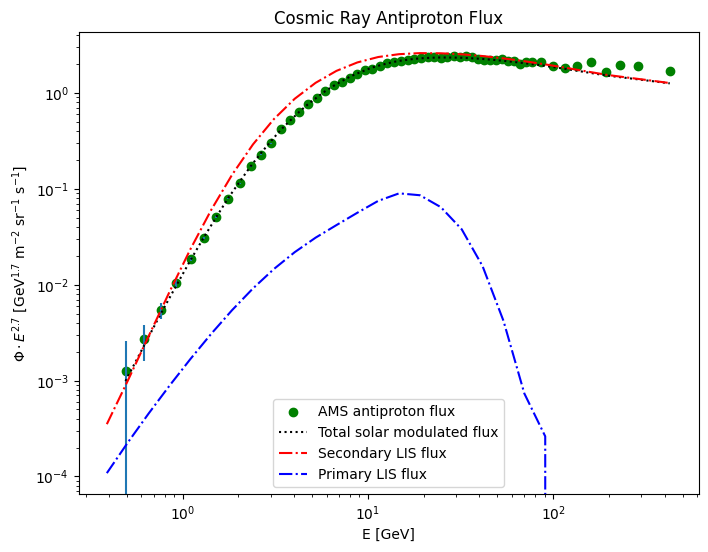

In [13]:
# Plot of solar modulated DM+CR flux and AMS flux
DM_LIS = phi_DM_LIS[0][0]
S_flux = DRN.phi_CR_LIS[0]
DMCR_flux = phi_DMCR[0][0]

DM_E = E_ams
S_E = E_ams

plt.figure(figsize=(8,6))
plt.title('Cosmic Ray Antiproton Flux')
plt.scatter(E_ams, E_ams**2.7 * phi_ams, c='g', label = 'AMS antiproton flux')
plt.errorbar(E_ams,E_ams**2.7*phi_ams,error_ams,linestyle = '')
plt.plot(DM_E, DM_E**2.7 * DMCR_flux,  c = 'black', linestyle = 'dotted', label = 'Total solar modulated flux')
plt.plot(E_drn, E_drn**2.7 * S_flux,c='r', linestyle = 'dashdot', label = 'Secondary LIS flux ')
plt.plot(E_drn, E_drn**2.7 * DM_LIS,c='b', linestyle = 'dashdot', label = 'Primary LIS flux')

plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi \cdot E^{2.7}$ [GeV$^{1.7}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E [GeV]')
plt.show()
